2026-02-13 20:42:34.072782: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-13 20:42:34.083143: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-13 20:42:34.450716: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-13 20:42:35.756447: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

Dataset downloaded to: /home/muqeet/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1


/home/muqeet/myenv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-02-13 20:42:49.015676: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.6715 - loss: 1.1853 - val_accuracy: 0.9666 - val_loss: 0.1327
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9265 - loss: 0.2366 - val_accuracy: 0.9834 - val_loss: 0.0621
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9512 - loss: 0.1577 - val_accuracy: 0.9909 - val_loss: 0.0366
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9643 - loss: 0.1182 - val_accuracy: 0.9888 - val_loss: 0.0401
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9691 - loss: 0.1017 - val_accuracy: 0.9903 - val_loss: 0.0358
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9749 - loss: 0.0833 - val_accuracy: 0.9923 - val_loss: 0.0299
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9765 - loss: 0.0759 - val_accuracy: 0.9941 - val_loss: 0.0234
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9769 - loss: 0.0776 - 

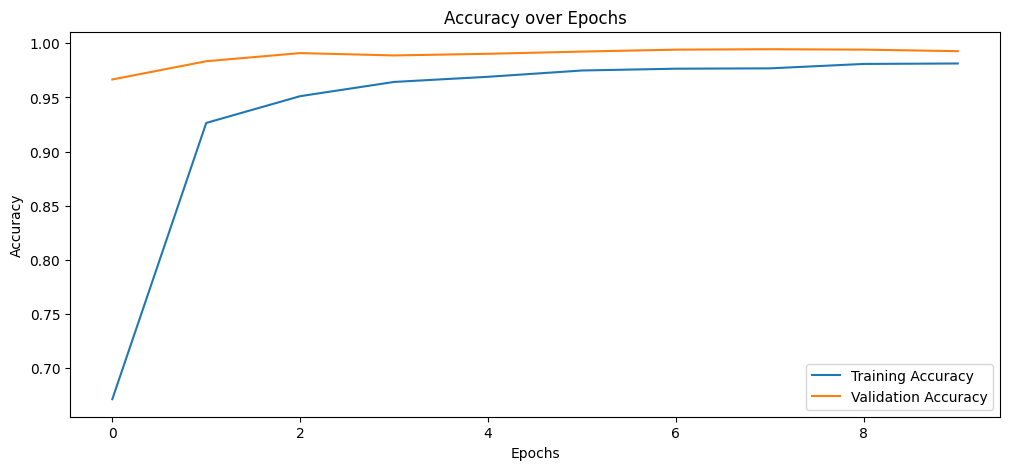

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
Final Test Accuracy: 96.22%


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from PIL import Image
import os
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")
print(f"Dataset downloaded to: {path}")

data_dir = path
train_path = os.path.join(data_dir, 'Train')
test_path = os.path.join(data_dir, 'Test')

data = []
labels = []
classes = 43

for i in range(classes):
    path_to_class = os.path.join(train_path, str(i))
    images = os.listdir(path_to_class)
    
    for img_name in images:
        try:
            img_path = os.path.join(path_to_class, img_name)
            image = Image.open(img_path)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception:
            pass

data = np.array(data)
labels = np.array(labels)

X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

X_train = X_train / 255.0
X_val = X_val / 255.0

y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

model.save("traffic_classifier.h5")

plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

csv_path = os.path.join(data_dir, 'Test.csv')
y_test_df = pd.read_csv(csv_path)

labels_test = y_test_df["ClassId"].values
imgs_test = y_test_df["Path"].values

data_test = []

for img_name in imgs_test:
    try:
        img_path = os.path.join(data_dir, img_name)
        image = Image.open(img_path)
        image = image.resize((30, 30))
        data_test.append(np.array(image))
    except:
        pass

X_test = np.array(data_test)
X_test = X_test / 255.0

pred_probs = model.predict(X_test)
pred_classes = np.argmax(pred_probs, axis=1)

acc = accuracy_score(labels_test, pred_classes)
print(f"Final Test Accuracy: {acc:.2%}")